In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error,r2_score


%matplotlib inline
sns.set()

In [2]:
data = pd.read_csv('Dataset.csv')
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [3]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
data.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [5]:
data.sample(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
1124,1318,Baskin Robbins,1,Ghaziabad,"1st Floor, Shipra Mall, Gulmohar Road, Indirap...","Shipra Mall, Indirapuram","Shipra Mall, Indirapuram, Ghaziabad",77.370400,28.633928,Ice Cream,...,Indian Rupees(Rs.),No,Yes,No,No,1,3.3,Orange,Average,27
2338,101212,Tapri Central,1,Jaipur,"B4 E, 3rd Floor, Surana Jewellers, Opposite Ce...",C Scheme,"C Scheme, Jaipur",75.810753,26.905190,"Cafe, Fast Food, Street Food",...,Indian Rupees(Rs.),No,Yes,No,No,2,4.7,Dark Green,Excellent,1469
9291,7417455,Talaga Sampireun,94,Jakarta,"Taman Impian Jaya Ancol, Jl. Lapangan Golf 7, ...","Taman Impian Jaya Ancol, Ancol","Taman Impian Jaya Ancol, Ancol, Jakarta",106.833553,-6.126860,"Sunda, Indonesian",...,Indonesian Rupiah(IDR),No,No,No,No,3,4.9,Dark Green,Excellent,1640
5588,18363048,Hasty Tasty,1,New Delhi,"Opposite Batra Cinema, Mukherjee Nagar, New Delhi",Mukherjee Nagar,"Mukherjee Nagar, New Delhi",77.214603,28.711021,Chinese,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,1
6007,300608,Chowmein Hut,1,New Delhi,"1346, Sangarashan, Paharganj, New Delhi",Paharganj,"Paharganj, New Delhi",77.212264,28.643792,Chinese,...,Indian Rupees(Rs.),No,No,No,No,1,2.9,Orange,Average,4


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [8]:
data.describe().round(2)

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.00,9551.00,9551.00,9551.00,9551.00,9551.00,9551.00,9551.00
mean,9051128.35,18.37,64.13,25.85,1199.21,1.80,2.67,156.91
std,8791521.28,56.75,41.47,11.01,16121.18,0.91,1.52,430.17
min,53.00,1.00,-157.95,-41.33,0.00,1.00,0.00,0.00
25%,301962.50,1.00,77.08,28.48,250.00,1.00,2.50,5.00
50%,6004089.00,1.00,77.19,28.57,400.00,2.00,3.20,31.00
75%,18352291.50,1.00,77.28,28.64,700.00,2.00,3.70,131.00
max,18500652.00,216.00,174.83,55.98,800000.00,4.00,4.90,10934.00


In [9]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [65]:
data['Switch to order menu'].value_counts()

No    9542
Name: Switch to order menu, dtype: int64

In [66]:
data['Is delivering now'].value_counts()

No     9508
Yes      34
Name: Is delivering now, dtype: int64

In [10]:
data.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

<AxesSubplot:>

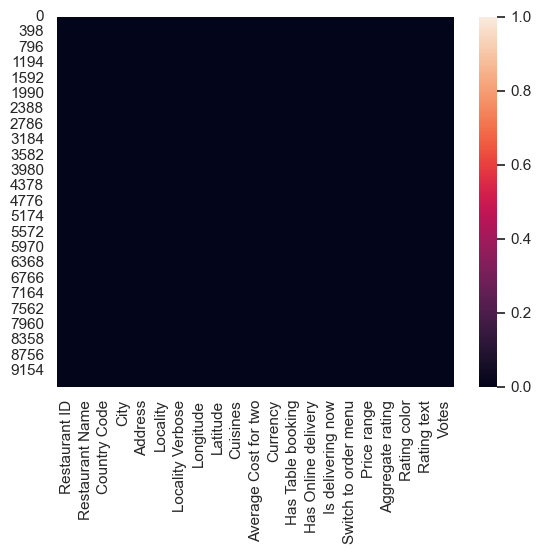

In [16]:
sns.heatmap(data.isna())

In [18]:
data = data.dropna()
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [19]:
data.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [20]:
data.duplicated().sum()

0

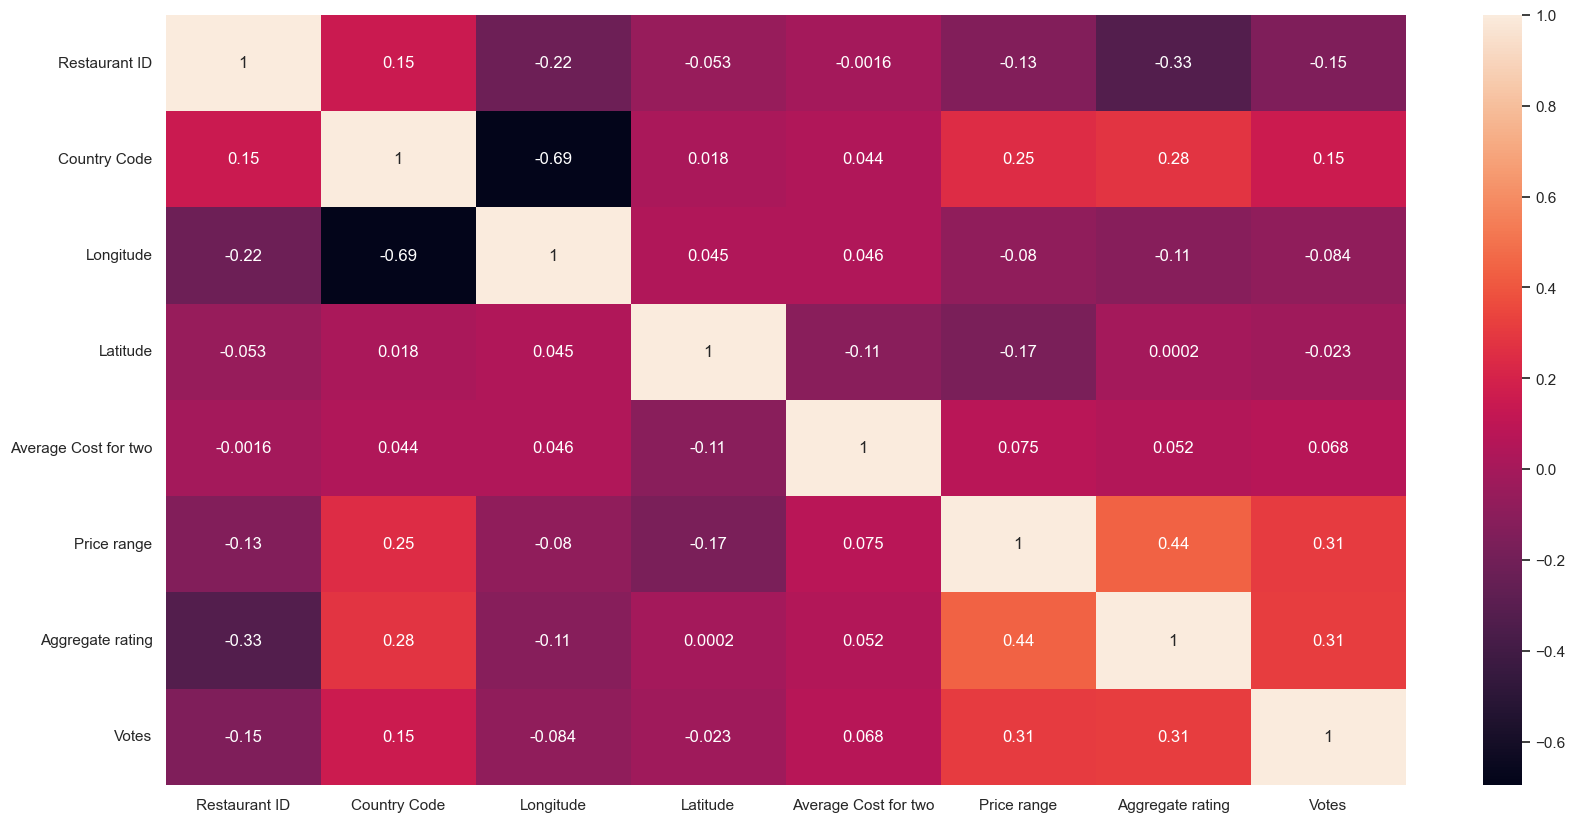

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [74]:
data_copy = data.copy()

In [75]:
data_copy.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [76]:
data_copy = data_copy.iloc[:,[0,2,7,8,10,12,13,14,15,16,17,19]]
data_copy.head()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text
0,6317637,162,121.027535,14.565443,1100,Yes,No,No,No,3,4.8,Excellent
1,6304287,162,121.014101,14.553708,1200,Yes,No,No,No,3,4.5,Excellent
2,6300002,162,121.056831,14.581404,4000,Yes,No,No,No,4,4.4,Very Good
3,6318506,162,121.056475,14.585318,1500,No,No,No,No,4,4.9,Excellent
4,6314302,162,121.057508,14.584450,1500,Yes,No,No,No,4,4.8,Excellent


In [77]:
ohe = LabelEncoder()

In [78]:
data_copy['Has Table booking'] = ohe.fit_transform(data_copy['Has Table booking'])

In [79]:
data_copy['Has Online delivery'] = ohe.fit_transform(data_copy['Has Online delivery'])

In [80]:
data_copy['Is delivering now'] = ohe.fit_transform(data_copy['Is delivering now'])

In [81]:
data_copy['Switch to order menu'] = ohe.fit_transform(data_copy['Switch to order menu'])

In [82]:
data_copy['Rating text'] = ohe.fit_transform(data_copy['Rating text'])

In [83]:
data_copy

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text
0,6317637,162,121.027535,14.565443,1100,1,0,0,0,3,4.8,1
1,6304287,162,121.014101,14.553708,1200,1,0,0,0,3,4.5,1
2,6300002,162,121.056831,14.581404,4000,1,0,0,0,4,4.4,5
3,6318506,162,121.056475,14.585318,1500,0,0,0,0,4,4.9,1
4,6314302,162,121.057508,14.584450,1500,1,0,0,0,4,4.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,208,28.977392,41.022793,80,0,0,0,0,3,4.1,5
9547,5908749,208,29.041297,41.009847,105,0,0,0,0,3,4.2,5
9548,5915807,208,29.034640,41.055817,170,0,0,0,0,4,3.7,2
9549,5916112,208,29.036019,41.057979,120,0,0,0,0,4,4.0,5


In [84]:
data_copy.sample(5)

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text
2331,1401948,1,75.886362,22.761593,650,0,0,0,0,2,3.8,2
5220,301848,1,77.114446,28.625847,150,0,0,0,0,1,2.9,0
637,3400346,1,78.040165,27.161850,0,0,0,0,0,1,4.9,1
9177,2700024,1,85.325347,23.359033,400,0,0,0,0,1,3.3,0
7707,3072,1,77.157316,28.523209,600,0,1,0,0,2,3.4,0


<AxesSubplot:xlabel='Has Table booking', ylabel='count'>

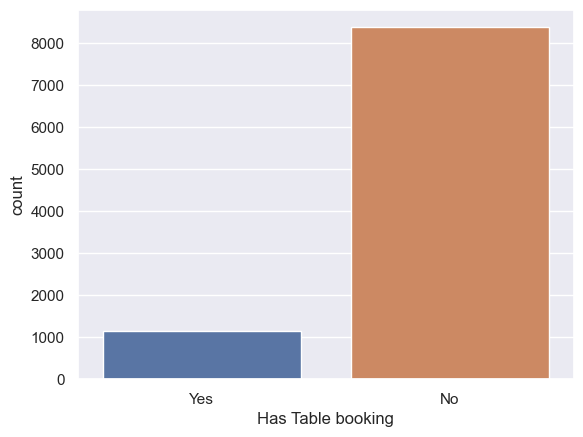

In [85]:
sns.countplot(data=data,x='Has Table booking')

<AxesSubplot:xlabel='Has Online delivery', ylabel='count'>

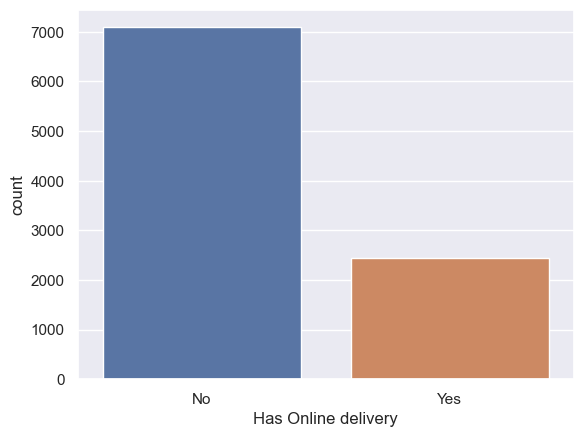

In [86]:
sns.countplot(data=data,x='Has Online delivery')

<AxesSubplot:xlabel='Is delivering now', ylabel='count'>

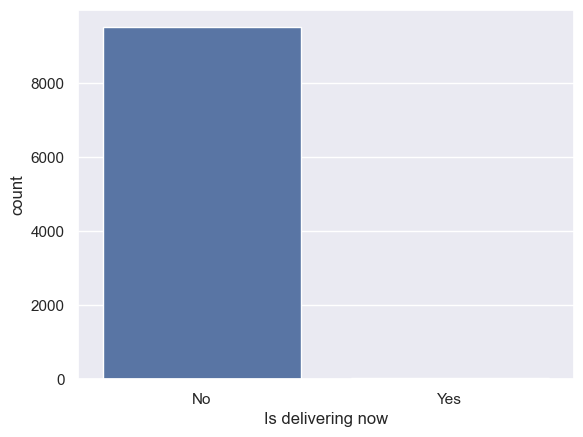

In [87]:
sns.countplot(data=data,x='Is delivering now')

In [69]:
data_copy['Rating text'].value_counts()

Average      3734
Not rated    2148
Good         2096
Very Good    1078
Excellent     300
Poor          186
Name: Rating text, dtype: int64

<AxesSubplot:xlabel='Switch to order menu', ylabel='count'>

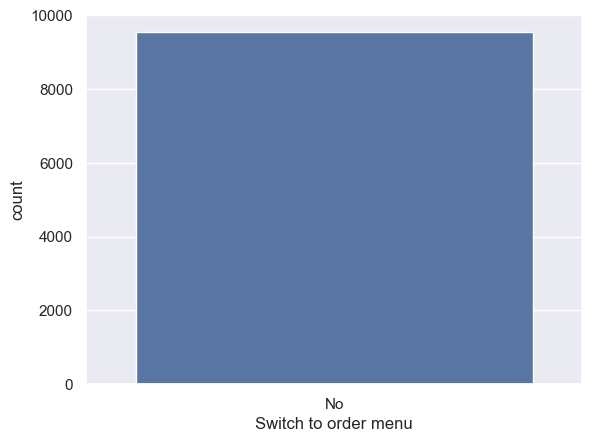

In [88]:
sns.countplot(data=data,x='Switch to order menu')

In [89]:
data_copy.head()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text
0,6317637,162,121.027535,14.565443,1100,1,0,0,0,3,4.8,1
1,6304287,162,121.014101,14.553708,1200,1,0,0,0,3,4.5,1
2,6300002,162,121.056831,14.581404,4000,1,0,0,0,4,4.4,5
3,6318506,162,121.056475,14.585318,1500,0,0,0,0,4,4.9,1
4,6314302,162,121.057508,14.584450,1500,1,0,0,0,4,4.8,1


In [92]:
X = data_copy.iloc[:,[0,1,2,3,4,5,6,7,8,9,11]].values
X

array([[6.31763700e+06, 1.62000000e+02, 1.21027535e+02, ...,
        0.00000000e+00, 3.00000000e+00, 1.00000000e+00],
       [6.30428700e+06, 1.62000000e+02, 1.21014101e+02, ...,
        0.00000000e+00, 3.00000000e+00, 1.00000000e+00],
       [6.30000200e+06, 1.62000000e+02, 1.21056831e+02, ...,
        0.00000000e+00, 4.00000000e+00, 5.00000000e+00],
       ...,
       [5.91580700e+06, 2.08000000e+02, 2.90346400e+01, ...,
        0.00000000e+00, 4.00000000e+00, 2.00000000e+00],
       [5.91611200e+06, 2.08000000e+02, 2.90360190e+01, ...,
        0.00000000e+00, 4.00000000e+00, 5.00000000e+00],
       [5.92740200e+06, 2.08000000e+02, 2.90260160e+01, ...,
        0.00000000e+00, 2.00000000e+00, 5.00000000e+00]])

In [93]:
y = data_copy.iloc[:,-2]
y

0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 9542, dtype: float64

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [95]:
X_train.shape

(6393, 11)

In [96]:
y_train.shape

(6393,)

In [97]:
X_test.shape

(3149, 11)

In [98]:
y_test.shape

(3149,)

In [ ]:
LinearRegression
DecisionTreeClassifier

In [104]:
reg = LinearRegression()

In [105]:
reg.fit(X_train,y_train)

LinearRegression()

In [106]:
y_predict = reg.predict(X_test)
y_predict

array([1.28795396, 1.96755735, 3.35766048, ..., 3.19558408, 1.80670007,
       3.17753493])

In [111]:
r2_score(y_predict,y_test)

-0.4264394337964721

In [112]:
mean_squared_error(y_predict,y_test)

1.3095557134556135

In [116]:
from sklearn.tree import DecisionTreeRegressor

In [117]:
model = DecisionTreeRegressor()

In [118]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [119]:
y_predict = model.predict(X_test)
y_predict

array([0. , 4.4, 2.5, ..., 2.6, 0. , 4.3])

In [120]:
r2_score(y_predict,y_test)

0.973754914930843